# Predicting Rent Prices Based on Unit/House Data
*Exploratory Data Analysis, Data Processing, Model Development, and Model Deployment by Charles Selden*
***

## Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker  
from sklearn.preprocessing import OneHotEncoder
from pandas.api.types import CategoricalDtype

***

## Importing the Dataset

In [2]:
data = pd.read_csv("~/Documents/data/house_data/House_Rent_Dataset.csv")
columns = list(data.columns)

In [3]:
column_to_description = {}

descriptions_temp = ["Posted On: The date on which the house listing was posted.",
"BHK: Number of Bedrooms, Hall, Kitchen.",
"Rent: Rent of the Houses/Apartments/Flats.",
"Size: Size of the Houses/Apartments/Flats in Square Feet.",
"Floor: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)",
"Area Type: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.",
"Area Locality: Locality of the Houses/Apartments/Flats.",
"City: City where the Houses/Apartments/Flats are Located.",
"Furnishing Status: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.",
"Tenant Preferred: Type of Tenant Preferred by the Owner or Agent.",
"Bathroom: Number of Bathrooms.",
"Point of Contact: Whom should you contact for more information regarding the Houses/Apartments/Flats."]

for i in range(len(list(data.columns))):
    column_to_description[columns[i]] = descriptions_temp[i]
                                  
for i in columns:
    print(column_to_description[i])

Posted On: The date on which the house listing was posted.
BHK: Number of Bedrooms, Hall, Kitchen.
Rent: Rent of the Houses/Apartments/Flats.
Size: Size of the Houses/Apartments/Flats in Square Feet.
Floor: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)
Area Type: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.
Area Locality: Locality of the Houses/Apartments/Flats.
City: City where the Houses/Apartments/Flats are Located.
Furnishing Status: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.
Tenant Preferred: Type of Tenant Preferred by the Owner or Agent.
Bathroom: Number of Bathrooms.
Point of Contact: Whom should you contact for more information regarding the Houses/Apartments/Flats.


***

# Exploring the Dataset

## Posted On

In [4]:
print(column_to_description["Posted On"],"\n")
print(data["Posted On"],"\n")
posted_counts = data["Posted On"].value_counts()
print(posted_counts)

Posted On: The date on which the house listing was posted. 

0       2022-05-18
1       2022-05-13
2       2022-05-16
3       2022-07-04
4       2022-05-09
           ...    
4741    2022-05-18
4742    2022-05-15
4743    2022-07-10
4744    2022-07-06
4745    2022-05-04
Name: Posted On, Length: 4746, dtype: object 

2022-07-06    311
2022-05-12    149
2022-06-04    135
2022-07-09    126
2022-05-23    125
             ... 
2022-04-24      6
2022-04-25      6
2022-04-26      2
2022-04-13      1
2022-07-11      1
Name: Posted On, Length: 81, dtype: int64


#### Maybe convert dates to int representing time since first listed date/start of 2020

## BHK

In [5]:
print(column_to_description["BHK"],"\n")
print(data["BHK"],"\n")
print(data["BHK"].value_counts())

BHK: Number of Bedrooms, Hall, Kitchen. 

0       2
1       2
2       2
3       2
4       2
       ..
4741    2
4742    3
4743    3
4744    3
4745    2
Name: BHK, Length: 4746, dtype: int64 

2    2265
1    1167
3    1098
4     189
5      19
6       8
Name: BHK, dtype: int64


#### Simple, works in current form

## Rent

In [6]:
print(column_to_description["Rent"],"\n")
print(data["Rent"])

Rent: Rent of the Houses/Apartments/Flats. 

0       10000
1       20000
2       17000
3       10000
4        7500
        ...  
4741    15000
4742    29000
4743    35000
4744    45000
4745    15000
Name: Rent, Length: 4746, dtype: int64


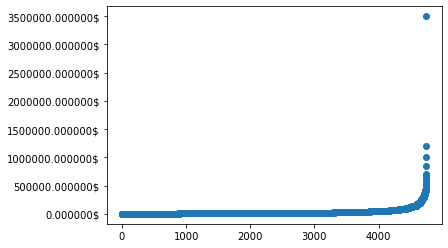

In [7]:
plt.scatter(range(len(data["Rent"])),np.sort(data["Rent"]))
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%f$'))

#### Lets put a limit on the y axis to ignore the extreme outliers.

(0.0, 600000.0)

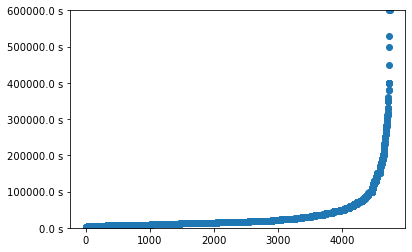

In [8]:
plt.scatter(range(len(data["Rent"])),np.sort(data["Rent"]))
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f s'))
plt.ylim(0,600000)

#### Scalar value, easy to use. Our y value, what we want to predict using the model. A few extremely high outliers, but the majority values are under 100,000 and an even larger majority are under 400,000.

## Size

In [9]:
print(column_to_description["Size"],"\n")
print(data["Size"])

Size: Size of the Houses/Apartments/Flats in Square Feet. 

0       1100
1        800
2       1000
3        800
4        850
        ... 
4741    1000
4742    2000
4743    1750
4744    1500
4745    1000
Name: Size, Length: 4746, dtype: int64


#### In square feet, makes using much easier than a categorical version.

## Floor

In [10]:
print(column_to_description["Floor"],"\n")
print(data["Floor"],"\n")
print(data["Floor"].value_counts())

Floor: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.) 

0       Ground out of 2
1            1 out of 3
2            1 out of 3
3            1 out of 2
4            1 out of 2
             ...       
4741         3 out of 5
4742         1 out of 4
4743         3 out of 5
4744       23 out of 34
4745         4 out of 5
Name: Floor, Length: 4746, dtype: object 

1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
                  ... 
11 out of 31         1
50 out of 75         1
18 out of 26         1
12 out of 27         1
23 out of 34         1
Name: Floor, Length: 480, dtype: int64


#### Actual values are scalar but in a string format, split into two seperate columns for the floor the room is on as well as the total number of floors the place has.

## Area Type

In [11]:
print(column_to_description["Area Type"],"\n")
print(data["Area Type"],"\n")
print(data["Area Type"].value_counts())

Area Type: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area. 

0        Super Area
1        Super Area
2        Super Area
3        Super Area
4       Carpet Area
           ...     
4741    Carpet Area
4742     Super Area
4743    Carpet Area
4744    Carpet Area
4745    Carpet Area
Name: Area Type, Length: 4746, dtype: object 

Super Area     2446
Carpet Area    2298
Built Area        2
Name: Area Type, dtype: int64


#### Super area includes sq feet for areas the tenant will have access to outside his apartment/house (stairways, public areas, hallways), while carpet area is just the apartment or house itself.

## Area Locality

In [12]:
print(column_to_description["Area Locality"],"\n")
print(data["Area Locality"],"\n")
print(data["Area Locality"].value_counts())

Area Locality: Locality of the Houses/Apartments/Flats. 

0                         Bandel
1       Phool Bagan, Kankurgachi
2        Salt Lake City Sector 2
3                    Dumdum Park
4                  South Dum Dum
                  ...           
4741                Bandam Kommu
4742        Manikonda, Hyderabad
4743        Himayath Nagar, NH 7
4744                  Gachibowli
4745             Suchitra Circle
Name: Area Locality, Length: 4746, dtype: object 

Bandra West                                37
Gachibowli                                 29
Electronic City                            24
Velachery                                  22
Miyapur, NH 9                              22
                                           ..
Kengeri Upanagara                           1
Ittamadu, Banashankari, Outer Ring Road     1
Rmv Extension, Armane Nagar                 1
snv la                                      1
Manikonda, Hyderabad                        1
Name: Area Locality, L

(array([496., 499., 301., 332., 551., 430., 379., 769., 644., 345.]),
 array([   0. ,  223.4,  446.8,  670.2,  893.6, 1117. , 1340.4, 1563.8,
        1787.2, 2010.6, 2234. ]),
 <BarContainer object of 10 artists>)

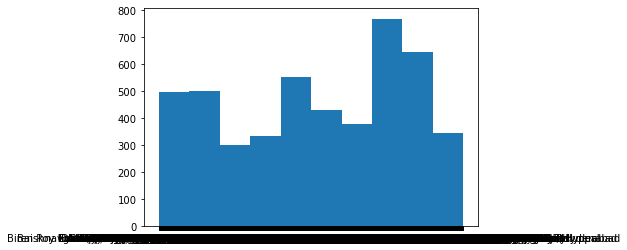

In [13]:
plt.hist(data["Area Locality"])

#### Too many categorical variables with only a few data points to one-hot encode or label encode, just use city instead.

## City

In [14]:
print(column_to_description["City"],"\n")
print(data["City"],"\n")
print(data["City"].value_counts())

City: City where the Houses/Apartments/Flats are Located. 

0         Kolkata
1         Kolkata
2         Kolkata
3         Kolkata
4         Kolkata
          ...    
4741    Hyderabad
4742    Hyderabad
4743    Hyderabad
4744    Hyderabad
4745    Hyderabad
Name: City, Length: 4746, dtype: object 

Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: City, dtype: int64


#### To be used instead of Locality, the issue of how to encode this categorical data is still a concern. Forgot that one-hot encoding created a column for each value which have binary values, this definitely is the best encoding scheme to use here.

## Furnishing Status

In [15]:
print(column_to_description["Furnishing Status"],"\n")
print(data["Furnishing Status"],"\n")
print(data["Furnishing Status"].value_counts())

Furnishing Status: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished. 

0          Unfurnished
1       Semi-Furnished
2       Semi-Furnished
3          Unfurnished
4          Unfurnished
             ...      
4741    Semi-Furnished
4742    Semi-Furnished
4743    Semi-Furnished
4744    Semi-Furnished
4745       Unfurnished
Name: Furnishing Status, Length: 4746, dtype: object 

Semi-Furnished    2251
Unfurnished       1815
Furnished          680
Name: Furnishing Status, dtype: int64


#### Categorical Data but seems like it would likely perform well if label-encoded as the categories are a scale from Unfurnished  through Furnished. Just need to make sure that unfurnished = 0, semi-furnished = 1, and furnished = 2

## Tenant Preferred

In [16]:
print(column_to_description["Tenant Preferred"],"\n")
print(data["Tenant Preferred"],"\n")
print(data["Tenant Preferred"].value_counts())

Tenant Preferred: Type of Tenant Preferred by the Owner or Agent. 

0       Bachelors/Family
1       Bachelors/Family
2       Bachelors/Family
3       Bachelors/Family
4              Bachelors
              ...       
4741    Bachelors/Family
4742    Bachelors/Family
4743    Bachelors/Family
4744              Family
4745           Bachelors
Name: Tenant Preferred, Length: 4746, dtype: object 

Bachelors/Family    3444
Bachelors            830
Family               472
Name: Tenant Preferred, dtype: int64


#### Potentially able to use one-hot encoding for this, but might not give as much information as it potentially could.

## Bathroom

In [17]:
print(column_to_description["Bathroom"],"\n")
print(data["Bathroom"],"\n")
print(data["Bathroom"].value_counts())

Bathroom: Number of Bathrooms. 

0       2
1       1
2       1
3       1
4       1
       ..
4741    2
4742    3
4743    3
4744    2
4745    2
Name: Bathroom, Length: 4746, dtype: int64 

2     2291
1     1474
3      749
4      156
5       60
6       12
7        3
10       1
Name: Bathroom, dtype: int64


#### No problem to use, simple scalar integer value.

## Point of Contact

In [18]:
print(column_to_description["Point of Contact"],"\n")
print(data["Point of Contact"], "\n")
print(data["Point of Contact"].value_counts())

Point of Contact: Whom should you contact for more information regarding the Houses/Apartments/Flats. 

0       Contact Owner
1       Contact Owner
2       Contact Owner
3       Contact Owner
4       Contact Owner
            ...      
4741    Contact Owner
4742    Contact Owner
4743    Contact Agent
4744    Contact Agent
4745    Contact Owner
Name: Point of Contact, Length: 4746, dtype: object 

Contact Owner      3216
Contact Agent      1529
Contact Builder       1
Name: Point of Contact, dtype: int64


#### Maybe remove contact builder since with just one data point we can't learn how this factors into the regression robustly.
***

# Checking for Missing Values

In [19]:
for i in columns:
    print(str(i) + ":",data[i].isnull().sum())

Posted On: 0
BHK: 0
Rent: 0
Size: 0
Floor: 0
Area Type: 0
Area Locality: 0
City: 0
Furnishing Status: 0
Tenant Preferred: 0
Bathroom: 0
Point of Contact: 0


#### There are no missing values in this dataset.

***

# Data Engineering and Processing

## Steps to be taken based on EDA:
1. `Posted On`: Convert Date to time since start of 2022.
2. `Size`: Maybe scale this using *Area Type* if it doesn't work well in the regression elsewise. For now having *Area Type* as a label-encoded variable which learns a flat value to adjust the outcome by might be fine, but the difference between different *Size*s will vary as some super-areas will severely overestimate *Size* and some will only minimally overestimate *Size*.
3. `Floor`: One of two options seems optimal. Both involve splitting the active floor and the total floors given the building first. The first option is just having both of those as seperate columns, the second option involves the floor the unit is on as the first column, and the ratio of that to the total floors in the building as the second.
The first option seems like the data is presented more clearly, but the second allows the relationship between the two to be passed directly in, as learning that might be suboptimal in terms of limiting learning other relationships. Call these columns *On Floor* and *Building Floors* in either case.
4. `Area Type`: If used to scale *Size* then don't use this column, otherwise use binary one-hot encoding for *Carpet Area* and *Super Area*, and throw out *Built Area* as that only has two data points.
5. `City`: This needs to be one-hot encoded, definitely good in this case as there are only a small number of cities with decent data population for each. 
6. `Furnishing Status`: Label encode with the following system. *Unfurnished* = 0, *Semi-Furnished* = 1, *Furnished* = 2.
7. `Tenant Preferred`: Do a kind of custom one-hot encoding. Normally each value would get its own column, but here we can just make two instead of three as one just represents both of the previous options simultaneously.
8. `Point of Contact`: Just drop the *Contact Builder* as it only has a single data point, the other two can be label encoded with 0 and 1.

***
## Taking these Steps

### Initial Data Shape

In [20]:
data.shape

(4746, 12)

### Step One - Making a Function to Update Posted On

In [21]:
posted_on_temp = data["Posted On"]
posted_on_temp

0       2022-05-18
1       2022-05-13
2       2022-05-16
3       2022-07-04
4       2022-05-09
           ...    
4741    2022-05-18
4742    2022-05-15
4743    2022-07-10
4744    2022-07-06
4745    2022-05-04
Name: Posted On, Length: 4746, dtype: object

In [22]:
#First we can check whether all the dates start in 2022, this same method can be applied using whatever year
# is the earliest date in the dataset.

split_dates = []

for i in range(len(posted_on_temp)):
    split_dates.append(posted_on_temp[i].split("-"))
    
    if split_dates[i][0] != "2022":
        print("diff date",split_dates[i])
        
#All data is from 2022, so will set 2022-01-01 to be 0, and every day past will increment.

#Tell number of days in a month given the month and year.
def numberOfDays(y, m):
      leap = 0
      if y% 400 == 0:
         leap = 1
      elif y % 100 == 0:
         leap = 0
      elif y% 4 == 0:
         leap = 1
      if m==2:
         return 28 + leap
      list = [1,3,5,7,8,10,12]
      if m in list:
         return 31
      return 30
    
def updatePostedOnToScalar(data,inPlace=True):
    list_of_date_num_equivalent = []    
    
    for i in range(len(split_dates)):
        date_num_equivalent = 0
        
        for j in range(int(split_dates[i][1])):
            date_num_equivalent = date_num_equivalent + numberOfDays(int(split_dates[i][0]),j)
            
        date_num_equivalent = date_num_equivalent + int(split_dates[i][2])
        
        list_of_date_num_equivalent.append(date_num_equivalent)
        
    list_of_date_num_equivalent = np.array(list_of_date_num_equivalent)
        
    if inPlace:
        #update passed dataset
        data["Posted On"] = list_of_date_num_equivalent
        
        return data
    else:
        #return new dataset which is the old dataset with the wanted updates but DONT update passed dataset
        # itself
        new_frame = data.copy(deep=True)
        new_frame["Posted On"] = list_of_date_num_equivalent
        
        return new_frame

### Step Two - Making a Function to Adjust Size if Necessary
*Nothing necessary here so far.*

### Step Three - Making a Function to Split Floor Column

In [23]:
#For now the method will split using the first option, implement the second if this seems to be inhibiting model
# performance during training.

def splitFloorIntoTwo(data,inPlace=True):
    original_floor = data["Floor"]
    floor_on = []
    floor_out_of = []
    for i in range(len(original_floor)):
        split = original_floor[i].split(" out of ")
        if len(split) == 1:
            floor_on.append(split[0])
            floor_out_of.append(split[0])
        else:  
            #Ground is 0, others are basement and such so all other non-int convertables go to -1
            if split[0] == 'Ground':
                floor_on.append(0)
            else:
                try:
                    floor_on.append(int(split[0]))
                except:
                    floor_on.append(-1)
            floor_out_of.append(int(split[1]))
    
    floor_on = np.array(floor_on)
    floor_out_of = np.array(floor_out_of)
    
    if inPlace:
        data["Floor On"] = floor_on
        data["Floor Out Of"] = floor_out_of
        
        data.drop("Floor",axis=1,inplace=True)
        
        return data
    else:
        new_data = data.copy(deep=True)
        
        new_data["Floor On"] = floor_on
        new_data["Floor Out Of"] = floor_out_of
        
        new_data.drop("Floor",axis=1,inplace=True)
        
        return new_data

### Step Four - Making a Function to Label Encode a Given Column

In [24]:
#Works for all columns which I need to label encode. MIGHT NEED TO GIVE A LIST OF THE CATEGORIES IN THE ORDER
# I WANT THEM ENCODED TO ENSURE THAT THEY ARE IN THE RIGHT SEQUENCE
# e.g. avoid (0-furnished,1-unfurnished,2-semifurnished) in favor of (0-unfurnished,1-semifurnished,2-furnisheds)

def labelEncodeColumn(data,column_name,inPlace=True):
    if inPlace:
        if column_name == "Furnishing Status":
            cat_type = CategoricalDtype(categories=["Unfurnished", "Semi-Furnished", "Furnished"], ordered=True)
            data[column_name] = data[column_name].astype(cat_type)
            data[column_name] = data[column_name].cat.codes
        else:
            data[column_name] = data[column_name].astype('category')
            data[column_name] = data[column_name].cat.codes
        
        return data
    else:
        data_copy = data.copy(deep=True)
        if column_name == "Furnishing Status":
            cat_type = CategoricalDtype(categories=["Unfurnished", "Semi-Furnished", "Furnished"], ordered=True)
            data_copy[column_name] = data_copy[column_name].astype(cat_type)
            data_copy[column_name] = data_copy[column_name].cat.codes
        else:
            data_copy[column_name] = data_copy[column_name].astype('category')
            data_copy[column_name] = data_copy[column_name].cat.codes
        
    return data_copy

### Step Five - Making a Function to One-Hot Encode a Given Column

In [25]:
#Works for all columns which I need to one-hot encode. UPDATE inPlace = FALSE!!!!

def oneHotEncodeColumn(data,column_name,inPlace=True):
    encoder = OneHotEncoder(handle_unknown='ignore',sparse=False)
    if inPlace:
        if column_name == "Tenant Preferred":
            bachelors = []
            family = []
            for i in range(len(data["Tenant Preferred"])):
                if data["Tenant Preferred"][i] == "Bachelors":
                    bachelors.append(1)
                    family.append(0)
                elif data["Tenant Preferred"][i] == "Family":
                    bachelors.append(0)
                    family.append(1)
                elif data["Tenant Preferred"][i] == "Bachelors/Family":
                    bachelors.append(1)
                    family.append(1)
                else:
                    print("issue w tenant preferred encoding")
            bachelors = pd.Series(bachelors)
            bachelors.name = "Bachelors"
            family = pd.Series(family)
            family.name = "Family"
            
            data = pd.concat([data,bachelors,family],axis=1)
            
            return data
                    
        else:
            encoded_data = pd.DataFrame(encoder.fit_transform(data[[column_name]]))

            feature_names = encoder.get_feature_names_out()
            for i in range(len(feature_names)):
                feature_names[i] = feature_names[i].split("_")
            for i in range(len(feature_names)):
                feature_names[i] = feature_names[i][1]

            encoded_data.columns = feature_names

            data = pd.concat([data,encoded_data],axis=1)
        
        return data
    else:
        data_copy = data.copy(deep=True)
        encoded_data = pd.DataFrame(encoder.fit_transform(data_copy[[column_name]]).toarray())
        
        return encoded_data

***
## Processing the Data for Training our Model

In [26]:
data.shape

(4746, 12)

In [27]:
data.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

## Step One - Update Posted On to Scalar Values

In [28]:
data["Posted On"]

0       2022-05-18
1       2022-05-13
2       2022-05-16
3       2022-07-04
4       2022-05-09
           ...    
4741    2022-05-18
4742    2022-05-15
4743    2022-07-10
4744    2022-07-06
4745    2022-05-04
Name: Posted On, Length: 4746, dtype: object

In [29]:
data = updatePostedOnToScalar(data)

In [30]:
data["Posted On"]

0       168
1       163
2       166
3       215
4       159
       ... 
4741    168
4742    165
4743    221
4744    217
4745    154
Name: Posted On, Length: 4746, dtype: int64

*Check that the update didn't create any null values unintentionally.*

In [31]:
columns = data.columns
for i in columns:
    print(str(i) + ":",data[i].isnull().sum())

Posted On: 0
BHK: 0
Rent: 0
Size: 0
Floor: 0
Area Type: 0
Area Locality: 0
City: 0
Furnishing Status: 0
Tenant Preferred: 0
Bathroom: 0
Point of Contact: 0


### Step Two - Adjust Size *(if necessary)*

### Step Three - Split Floor Column into Floor On and Floor Out Of

In [32]:
data["Floor"]

0       Ground out of 2
1            1 out of 3
2            1 out of 3
3            1 out of 2
4            1 out of 2
             ...       
4741         3 out of 5
4742         1 out of 4
4743         3 out of 5
4744       23 out of 34
4745         4 out of 5
Name: Floor, Length: 4746, dtype: object

In [33]:
data = splitFloorIntoTwo(data)

In [34]:
data["Floor On"]

0        0
1        1
2        1
3        1
4        1
        ..
4741     3
4742     1
4743     3
4744    23
4745     4
Name: Floor On, Length: 4746, dtype: object

In [35]:
data["Floor Out Of"]

0        2
1        3
2        3
3        2
4        2
        ..
4741     5
4742     4
4743     5
4744    34
4745     5
Name: Floor Out Of, Length: 4746, dtype: object

*Check that the update didn't create any null values unintentionally.*

In [36]:
columns = data.columns
for i in columns:
    print(str(i) + ":",data[i].isnull().sum())

Posted On: 0
BHK: 0
Rent: 0
Size: 0
Area Type: 0
Area Locality: 0
City: 0
Furnishing Status: 0
Tenant Preferred: 0
Bathroom: 0
Point of Contact: 0
Floor On: 0
Floor Out Of: 0


### Step Four - Encode Area Type

*First we need to drop Built Area as it has too few data points.*

In [ ]:
data['Area Type']

In [37]:
data = data.drop(data[data['Area Type'] == 'Built Area'].index)
data['Area Type'].value_counts()

Super Area     2446
Carpet Area    2298
Name: Area Type, dtype: int64

In [38]:
data = data.reset_index()
data

,index,Posted On,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor On,Floor Out Of
0,0,168,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2
1,1,163,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
2,2,166,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
3,3,215,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2
4,4,159,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,4741,168,2,15000,1000,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,3,5
4740,4742,165,3,29000,2000,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,1,4
4741,4743,221,3,35000,1750,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,3,5
4742,4744,217,3,45000,1500,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent,23,34


In [39]:
data.shape

(4744, 14)

*Check that dropping rows didn't create any null values unintentionally.*

In [40]:
columns = data.columns
for i in columns:
    print(str(i) + ":",data[i].isnull().sum())

index: 0
Posted On: 0
BHK: 0
Rent: 0
Size: 0
Area Type: 0
Area Locality: 0
City: 0
Furnishing Status: 0
Tenant Preferred: 0
Bathroom: 0
Point of Contact: 0
Floor On: 0
Floor Out Of: 0


*We can label encode into two categories after having dropped Built Area. Since there are only two potential categories, we don't need to worry about ordinality of the categories.*

In [41]:
data['Area Type']

0        Super Area
1        Super Area
2        Super Area
3        Super Area
4       Carpet Area
           ...     
4739    Carpet Area
4740     Super Area
4741    Carpet Area
4742    Carpet Area
4743    Carpet Area
Name: Area Type, Length: 4744, dtype: object

In [42]:
data = labelEncodeColumn(data,'Area Type')
data['Area Type']

0       1
1       1
2       1
3       1
4       0
       ..
4739    0
4740    1
4741    0
4742    0
4743    0
Name: Area Type, Length: 4744, dtype: int8

*Check that the update didn't create any null values unintentionally.*

In [60]:
columns = data.columns
for i in columns:
    print(str(i) + ":",data[i].isnull().sum())

Posted On: 0
BHK: 0
Rent: 0
Size: 0
Area Type: 0
Furnishing Status: 0
Bathroom: 0
Point of Contact: 0
Floor On: 0
Floor Out Of: 0
Bangalore: 0
Chennai: 0
Delhi: 0
Hyderabad: 0
Kolkata: 0
Mumbai: 0
Bachelors: 0
Family: 0


### Step Five - One-Hot Encoding for City

In [43]:
data['City']

0         Kolkata
1         Kolkata
2         Kolkata
3         Kolkata
4         Kolkata
          ...    
4739    Hyderabad
4740    Hyderabad
4741    Hyderabad
4742    Hyderabad
4743    Hyderabad
Name: City, Length: 4744, dtype: object

In [44]:
data = oneHotEncodeColumn(data,'City')

In [45]:
data = data.drop("City",axis=1)
data = data.drop("Area Locality",axis=1)

In [46]:
data

,index,Posted On,BHK,Rent,Size,Area Type,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor On,Floor Out Of,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
0,0,168,2,10000,1100,1,Unfurnished,Bachelors/Family,2,Contact Owner,0,2,0.0,0.0,0.0,0.0,1.0,0.0
1,1,163,2,20000,800,1,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3,0.0,0.0,0.0,0.0,1.0,0.0
2,2,166,2,17000,1000,1,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3,0.0,0.0,0.0,0.0,1.0,0.0
3,3,215,2,10000,800,1,Unfurnished,Bachelors/Family,1,Contact Owner,1,2,0.0,0.0,0.0,0.0,1.0,0.0
4,4,159,2,7500,850,0,Unfurnished,Bachelors,1,Contact Owner,1,2,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,4741,168,2,15000,1000,0,Semi-Furnished,Bachelors/Family,2,Contact Owner,3,5,0.0,0.0,0.0,1.0,0.0,0.0
4740,4742,165,3,29000,2000,1,Semi-Furnished,Bachelors/Family,3,Contact Owner,1,4,0.0,0.0,0.0,1.0,0.0,0.0
4741,4743,221,3,35000,1750,0,Semi-Furnished,Bachelors/Family,3,Contact Agent,3,5,0.0,0.0,0.0,1.0,0.0,0.0
4742,4744,217,3,45000,1500,0,Semi-Furnished,Family,2,Contact Agent,23,34,0.0,0.0,0.0,1.0,0.0,0.0


*Check that the update didn't create any null values unintentionally.*

In [ ]:
columns = data.columns
for i in columns:
    print(str(i) + ":",data[i].isnull().sum())

### Step Six - Label *(or maybe ordinal)* Encode Furnishing Status

In [47]:
data['Furnishing Status']

0          Unfurnished
1       Semi-Furnished
2       Semi-Furnished
3          Unfurnished
4          Unfurnished
             ...      
4739    Semi-Furnished
4740    Semi-Furnished
4741    Semi-Furnished
4742    Semi-Furnished
4743       Unfurnished
Name: Furnishing Status, Length: 4744, dtype: object

In [48]:
data = labelEncodeColumn(data,'Furnishing Status',inPlace=True)
data['Furnishing Status']

0       0
1       1
2       1
3       0
4       0
       ..
4739    1
4740    1
4741    1
4742    1
4743    0
Name: Furnishing Status, Length: 4744, dtype: int8

*Check that the update didn't create any null values unintentionally.*

In [49]:
columns = data.columns
for i in columns:
    print(str(i) + ":",data[i].isnull().sum())

index: 0
Posted On: 0
BHK: 0
Rent: 0
Size: 0
Area Type: 0
Furnishing Status: 0
Tenant Preferred: 0
Bathroom: 0
Point of Contact: 0
Floor On: 0
Floor Out Of: 0
Bangalore: 0
Chennai: 0
Delhi: 0
Hyderabad: 0
Kolkata: 0
Mumbai: 0


### Step Seven - One-Hot Encode Tenant Preferred *(with bachelor and family both binary so they can include bachelor/family with just those columns)*

In [50]:
data["Tenant Preferred"]

0       Bachelors/Family
1       Bachelors/Family
2       Bachelors/Family
3       Bachelors/Family
4              Bachelors
              ...       
4739    Bachelors/Family
4740    Bachelors/Family
4741    Bachelors/Family
4742              Family
4743           Bachelors
Name: Tenant Preferred, Length: 4744, dtype: object

In [51]:
data = oneHotEncodeColumn(data,"Tenant Preferred")
columns = data.columns
columns

Index(['index', 'Posted On', 'BHK', 'Rent', 'Size', 'Area Type',
       'Furnishing Status', 'Tenant Preferred', 'Bathroom', 'Point of Contact',
       'Floor On', 'Floor Out Of', 'Bangalore', 'Chennai', 'Delhi',
       'Hyderabad', 'Kolkata', 'Mumbai', 'Bachelors', 'Family'],
      dtype='object')

In [52]:
data = data.drop("Tenant Preferred",axis=1)
data

,index,Posted On,BHK,Rent,Size,Area Type,Furnishing Status,Bathroom,Point of Contact,Floor On,Floor Out Of,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,Bachelors,Family
0,0,168,2,10000,1100,1,0,2,Contact Owner,0,2,0.0,0.0,0.0,0.0,1.0,0.0,1,1
1,1,163,2,20000,800,1,1,1,Contact Owner,1,3,0.0,0.0,0.0,0.0,1.0,0.0,1,1
2,2,166,2,17000,1000,1,1,1,Contact Owner,1,3,0.0,0.0,0.0,0.0,1.0,0.0,1,1
3,3,215,2,10000,800,1,0,1,Contact Owner,1,2,0.0,0.0,0.0,0.0,1.0,0.0,1,1
4,4,159,2,7500,850,0,0,1,Contact Owner,1,2,0.0,0.0,0.0,0.0,1.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,4741,168,2,15000,1000,0,1,2,Contact Owner,3,5,0.0,0.0,0.0,1.0,0.0,0.0,1,1
4740,4742,165,3,29000,2000,1,1,3,Contact Owner,1,4,0.0,0.0,0.0,1.0,0.0,0.0,1,1
4741,4743,221,3,35000,1750,0,1,3,Contact Agent,3,5,0.0,0.0,0.0,1.0,0.0,0.0,1,1
4742,4744,217,3,45000,1500,0,1,2,Contact Agent,23,34,0.0,0.0,0.0,1.0,0.0,0.0,0,1


*Check that the update didn't create any null values unintentionally.*

In [61]:
columns = data.columns
for i in columns:
    print(str(i) + ":",data[i].isnull().sum())

Posted On: 0
BHK: 0
Rent: 0
Size: 0
Area Type: 0
Furnishing Status: 0
Bathroom: 0
Point of Contact: 0
Floor On: 0
Floor Out Of: 0
Bangalore: 0
Chennai: 0
Delhi: 0
Hyderabad: 0
Kolkata: 0
Mumbai: 0
Bachelors: 0
Family: 0


### Step Eight - Label Encode Point of Contact

In [54]:
data['Point of Contact']

0       Contact Owner
1       Contact Owner
2       Contact Owner
3       Contact Owner
4       Contact Owner
            ...      
4739    Contact Owner
4740    Contact Owner
4741    Contact Agent
4742    Contact Agent
4743    Contact Owner
Name: Point of Contact, Length: 4744, dtype: object

*First I need to drop Contact Builder given the scarcity of data using that value.*

In [55]:
data = data.drop(data[data['Point of Contact'] == 'Contact Builder'].index)
data['Point of Contact'].value_counts()

Contact Owner    3214
Contact Agent    1529
Name: Point of Contact, dtype: int64

In [56]:
data = data.reset_index()
data

,level_0,index,Posted On,BHK,Rent,Size,Area Type,Furnishing Status,Bathroom,Point of Contact,Floor On,Floor Out Of,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,Bachelors,Family
0,0,0,168,2,10000,1100,1,0,2,Contact Owner,0,2,0.0,0.0,0.0,0.0,1.0,0.0,1,1
1,1,1,163,2,20000,800,1,1,1,Contact Owner,1,3,0.0,0.0,0.0,0.0,1.0,0.0,1,1
2,2,2,166,2,17000,1000,1,1,1,Contact Owner,1,3,0.0,0.0,0.0,0.0,1.0,0.0,1,1
3,3,3,215,2,10000,800,1,0,1,Contact Owner,1,2,0.0,0.0,0.0,0.0,1.0,0.0,1,1
4,4,4,159,2,7500,850,0,0,1,Contact Owner,1,2,0.0,0.0,0.0,0.0,1.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4738,4739,4741,168,2,15000,1000,0,1,2,Contact Owner,3,5,0.0,0.0,0.0,1.0,0.0,0.0,1,1
4739,4740,4742,165,3,29000,2000,1,1,3,Contact Owner,1,4,0.0,0.0,0.0,1.0,0.0,0.0,1,1
4740,4741,4743,221,3,35000,1750,0,1,3,Contact Agent,3,5,0.0,0.0,0.0,1.0,0.0,0.0,1,1
4741,4742,4744,217,3,45000,1500,0,1,2,Contact Agent,23,34,0.0,0.0,0.0,1.0,0.0,0.0,0,1


In [ ]:
columns = data.columns
for i in columns:
    print(str(i) + ":",data[i].isnull().sum())

*Next I just label encode the Point of Contact column.*

In [57]:
data = labelEncodeColumn(data,'Point of Contact')
data

,level_0,index,Posted On,BHK,Rent,Size,Area Type,Furnishing Status,Bathroom,Point of Contact,Floor On,Floor Out Of,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,Bachelors,Family
0,0,0,168,2,10000,1100,1,0,2,1,0,2,0.0,0.0,0.0,0.0,1.0,0.0,1,1
1,1,1,163,2,20000,800,1,1,1,1,1,3,0.0,0.0,0.0,0.0,1.0,0.0,1,1
2,2,2,166,2,17000,1000,1,1,1,1,1,3,0.0,0.0,0.0,0.0,1.0,0.0,1,1
3,3,3,215,2,10000,800,1,0,1,1,1,2,0.0,0.0,0.0,0.0,1.0,0.0,1,1
4,4,4,159,2,7500,850,0,0,1,1,1,2,0.0,0.0,0.0,0.0,1.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4738,4739,4741,168,2,15000,1000,0,1,2,1,3,5,0.0,0.0,0.0,1.0,0.0,0.0,1,1
4739,4740,4742,165,3,29000,2000,1,1,3,1,1,4,0.0,0.0,0.0,1.0,0.0,0.0,1,1
4740,4741,4743,221,3,35000,1750,0,1,3,0,3,5,0.0,0.0,0.0,1.0,0.0,0.0,1,1
4741,4742,4744,217,3,45000,1500,0,1,2,0,23,34,0.0,0.0,0.0,1.0,0.0,0.0,0,1


*Now after we remove the columns representing the indices at points in the process, we are finished processing our data.*

In [58]:
data = data.drop("level_0",axis=1)
data = data.drop("index",axis=1)
data

,Posted On,BHK,Rent,Size,Area Type,Furnishing Status,Bathroom,Point of Contact,Floor On,Floor Out Of,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,Bachelors,Family
0,168,2,10000,1100,1,0,2,1,0,2,0.0,0.0,0.0,0.0,1.0,0.0,1,1
1,163,2,20000,800,1,1,1,1,1,3,0.0,0.0,0.0,0.0,1.0,0.0,1,1
2,166,2,17000,1000,1,1,1,1,1,3,0.0,0.0,0.0,0.0,1.0,0.0,1,1
3,215,2,10000,800,1,0,1,1,1,2,0.0,0.0,0.0,0.0,1.0,0.0,1,1
4,159,2,7500,850,0,0,1,1,1,2,0.0,0.0,0.0,0.0,1.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4738,168,2,15000,1000,0,1,2,1,3,5,0.0,0.0,0.0,1.0,0.0,0.0,1,1
4739,165,3,29000,2000,1,1,3,1,1,4,0.0,0.0,0.0,1.0,0.0,0.0,1,1
4740,221,3,35000,1750,0,1,3,0,3,5,0.0,0.0,0.0,1.0,0.0,0.0,1,1
4741,217,3,45000,1500,0,1,2,0,23,34,0.0,0.0,0.0,1.0,0.0,0.0,0,1


# Model Usability Experimentation and Model Development

**Start here next time!**